**University of Windsor**

**COMP-8740:** Machine Learning and Pattern Recognition

**Project 1**

**Duedate:** October 20, 2021

**Authors:** L.Khalil & R.Khalil

**Abstract:** The goal of this project is to develop a classification model that can predict whether or not a user will accept a coupon while driving a vehicle based on his or her responses to a few survey questions. 

##Importing Libraries

In [4]:
#Importing Libraries

#for data frame processing
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#for plotting
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# for 3D projection
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

##Loading Data

In [5]:
#Loading Data from local drive
from google.colab import files
upload=files.upload()

#import data set as dataframe 
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")


Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation (1).csv


##Analyzing the dataframe

In [6]:
#Dimensions of Dataset (number of rows and columns)
df.shape

(12684, 26)

In [7]:
#Preview of data
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [8]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## Data Preprocessing

In [9]:
'''
Car --> 12684 - 108 = 12576 missing values
Bar --> 12684 - 12577 = 107 missing values
CoffeeHouse --> 12684 - 12467 = 217 missing values
CarryAway --> 12684 - 12533 = 151 missing values
RestaurantLessThan20 --> 12684 - 12554 = 130 missing values
Restaurant20To50 --> 12684 - 12495 = 189 missing values

'''
#1. Missing Values

#The attribute "Car" has a significant number of missing values and can be dropped 

# a) we check the values in "car" col before we drop it
print(df.car.unique())


[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


In [10]:
#b)No significant information provided. Now we can drop it

df.drop('car', inplace=True, axis=1)


In [11]:
#Impute missing values using Most Frequent values
#Other missing values in 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' are not significant numbers. Thus they can be replaced by the attribute with the largest count
for col in df.columns[df.isna().any()]:
    largest_count = df[col].value_counts().idxmax()
    df = df.fillna({col: largest_count})

In [12]:
#checking if "car" col was dropped and insignificant missing values were replaced.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [13]:
#2. Non-unique Values 

#Object types - 0 non unique values so nothing to do here
df.select_dtypes('object').nunique()

destination              3
passanger                4
weather                  3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
dtype: int64

In [14]:
#Integer types - toCoupon_GEQ5min contains one value only; this is insignificant to our training.
df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [15]:
# We do not need the info in toCoupon_GEQ5min since of the distance is greater than 5 minutes to the copoun location then it should be included in "toCoupon_GEQ15min" col
#drop toCoupon_GEQ5min
df.drop('toCoupon_GEQ5min', inplace=True, axis=1)

In [16]:
#checking if "toCoupon_GEQ5min" was dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [17]:
# To check the values in the remaining cols
for n in df.select_dtypes('object').columns:
    print(n, df[n].unique())

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Constr

#Feature Engineering

In [18]:
#We want our data to be catogerial in order to be able to convert it to numerical values (encode it)

#making a copy of the DataFrame 
df_to_convert = df.copy()

df_to_convert.dtypes

for col in df_to_convert.columns:
    if df_to_convert[col].dtype == np.object: 
        df_to_convert[col]=df_to_convert[col].astype('category')
    
df_to_convert.dtypes

destination             category
passanger               category
weather                 category
temperature                int64
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

# A) Encloding Ordinal Categorical Data

-When the order of the values matters, the caregories are ordinal. After encoding, the data sequence (order) should be retained. Thus, we will use a manual encoding methos similar to category_encoders.ordinal.OrdinalEncoder

-In Label encoding, each category is turned into an integer number that indicates its order.

-In this dataset we have 7 ordinal categorical columns: Income, age, RestaurantLessThan20, Restaurant20To50, Bar, CoffeHouse, and CarryAwat.


In [19]:
#To begin, we create maps to represent the categories and their respective orders.
#Then we need to convert the categorical data in these 7 columns into ordered numerical data 
#This can be done by match the cols with the numerical maps.

#This map is to represent the frequency of visits to restaurants, bars, and coffeehouses.
frequency_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}

#since some of the cols have the same categories, we can put them in a list
frequency_cols = ['Restaurant20To50', 'RestaurantLessThan20', 
                  'CarryAway', 'CoffeeHouse', 'Bar']

#use for loop to match cols with frequency_map
for col in frequency_cols:
    df_to_convert[col] = df_to_convert[col].map(frequency_map)


#This map is to represent the driver's age
age_map = {
    'below21': 0,
    '21': 1,
    '26': 2,
    '31': 3,
    '36': 4,
    '41': 5,
    '46': 6,
    '50plus': 7
}

#Here we match the age col with age map
df_to_convert['age'] = df_to_convert['age'].map(age_map)

#This map is to represent the driver's income
income_map = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

#Here we match the income col with income map
df_to_convert['income'] = df_to_convert['income'].map(income_map)

In [20]:
#To check the categories conversion

for n in df_to_convert.select_dtypes('category').columns:
    print(n, df_to_convert[n].unique())

destination ['No Urgent Place', 'Home', 'Work']
Categories (3, object): ['No Urgent Place', 'Home', 'Work']
passanger ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
Categories (4, object): ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
weather ['Sunny', 'Rainy', 'Snowy']
Categories (3, object): ['Sunny', 'Rainy', 'Snowy']
time ['2PM', '10AM', '6PM', '7AM', '10PM']
Categories (5, object): ['2PM', '10AM', '6PM', '7AM', '10PM']
coupon ['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']
Categories (5, object): ['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
                         'Restaurant(20-50)']
expiration ['1d', '2h']
Categories (2, object): ['1d', '2h']
gender ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
age [1, 6, 2, 3, 5, 7, 4, 0]
Categories (8, int64): [1, 6, 2, 3, 5, 7, 4, 0]
maritalStatus ['Unmarried partner', 'Single', 'Married partner', 'Divorced', 'Widowed']
Categories (5, object): ['Unmarried partner', 'S

#B)Encoding Nominal Categorical Data

-Since we have 10 Nominal categorical columns the one-hot encoding method is not recommneded. It will increase the sparsity of the data.Thus, we will use the Label Encoding method via Sklearn, as order does not matter.

-We noticed that 10 cols have nominal categorical data, meaning that the categories do not have an an inherent order. 

-These Nominal cols are: destination, passenger, weather, time, coupon, expiration, gender, maritalStatus, occupation, and education.

In [21]:
from sklearn.preprocessing import LabelEncoder
converter = LabelEncoder()
df_to_convert['destination'] = converter.fit_transform(df_to_convert['destination'])
df_to_convert['passanger'] = converter.fit_transform(df_to_convert['passanger'])
df_to_convert['weather'] = converter.fit_transform(df_to_convert['weather'])
df_to_convert['time'] = converter.fit_transform(df_to_convert['time'])
df_to_convert['coupon'] = converter.fit_transform(df_to_convert['coupon'])
df_to_convert['expiration'] = converter.fit_transform(df_to_convert['expiration'])
df_to_convert['gender'] = converter.fit_transform(df_to_convert['gender'])
df_to_convert['maritalStatus'] = converter.fit_transform(df_to_convert['maritalStatus'])
df_to_convert['education'] = converter.fit_transform(df_to_convert['education'])
df_to_convert['occupation'] = converter.fit_transform(df_to_convert['occupation'])

#To check the categories conversion

for n in df_to_convert.select_dtypes('int64').columns:
    print(n, df_to_convert[n].unique())

destination [1 0 2]
passanger [0 1 2 3]
weather [2 0 1]
temperature [55 80 30]
time [2 0 3 4 1]
coupon [4 2 1 0 3]
expiration [0 1]
gender [0 1]
maritalStatus [3 2 1 0 4]
has_children [1 0]
education [5 1 0 3 2 4]
occupation [24  0 22  7 11 10 21 15  1  5 14 17  4 16  6 13 20 12 23  3 19  9 18  2
  8]
toCoupon_GEQ15min [0 1]
toCoupon_GEQ25min [0 1]
direction_same [0 1]
direction_opp [1 0]
Y [1 0]


In [22]:
#To check the new data types in df
df_to_convert.dtypes

destination                int64
passanger                  int64
weather                    int64
temperature                int64
time                       int64
coupon                     int64
expiration                 int64
gender                     int64
age                     category
maritalStatus              int64
has_children               int64
education                  int64
occupation                 int64
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [23]:
#convert category cols to int

cols = ['age', 'income', 'Bar', 'CoffeeHouse','CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in cols:
  df_to_convert[col] = df_to_convert[col].astype('int64')

In [24]:
#To check that datatype converted correctly
df_to_convert.dtypes

destination             int64
passanger               int64
weather                 int64
temperature             int64
time                    int64
coupon                  int64
expiration              int64
gender                  int64
age                     int64
maritalStatus           int64
has_children            int64
education               int64
occupation              int64
income                  int64
Bar                     int64
CoffeeHouse             int64
CarryAway               int64
RestaurantLessThan20    int64
Restaurant20To50        int64
toCoupon_GEQ15min       int64
toCoupon_GEQ25min       int64
direction_same          int64
direction_opp           int64
Y                       int64
dtype: object

In [25]:
#Now, we check all the features in the dataset
for n in df_to_convert.columns:
    print(n, df_to_convert[n].unique())

destination [1 0 2]
passanger [0 1 2 3]
weather [2 0 1]
temperature [55 80 30]
time [2 0 3 4 1]
coupon [4 2 1 0 3]
expiration [0 1]
gender [0 1]
age [1 6 2 3 5 7 4 0]
maritalStatus [3 2 1 0 4]
has_children [1 0]
education [5 1 0 3 2 4]
occupation [24  0 22  7 11 10 21 15  1  5 14 17  4 16  6 13 20 12 23  3 19  9 18  2
  8]
income [3 5 1 6 4 2 8 7 0]
Bar [0 1 2 4 3]
CoffeeHouse [0 1 3 2 4]
CarryAway [2 3 4 1 0]
RestaurantLessThan20 [3 2 1 4 0]
Restaurant20To50 [2 1 0 4 3]
toCoupon_GEQ15min [0 1]
toCoupon_GEQ25min [0 1]
direction_same [0 1]
direction_opp [1 0]
Y [1 0]


# Data Visualization for features selection

#1)Ploatting the distribution of all feature variables 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f249f19fcd0>,
      dtype=object)

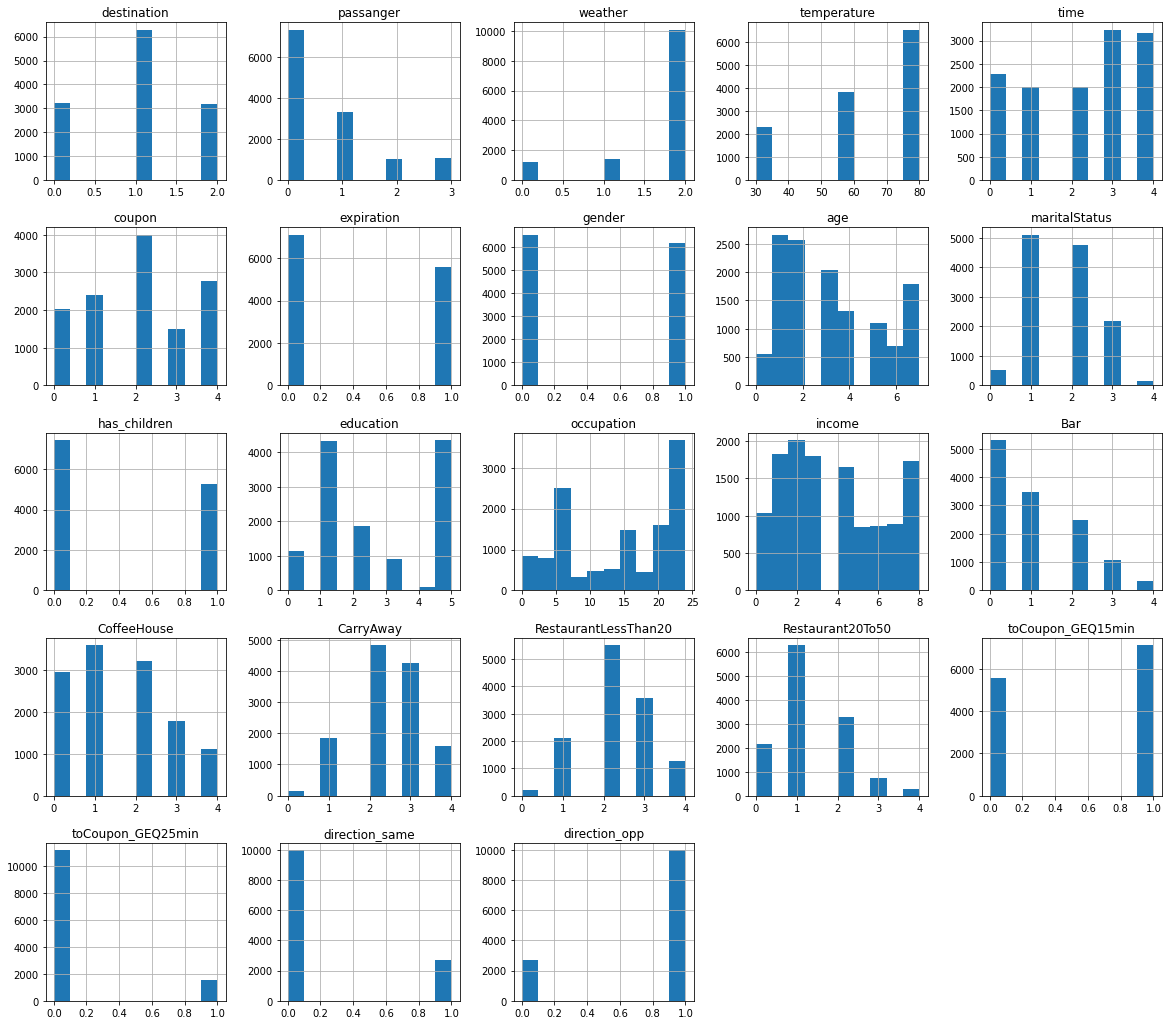

In [26]:
# We start by checking for class imbalance

#Making a copy of df_to_convert
df = df_to_convert.copy()

#to exclude Y col
df_visual = df.loc[:, df.columns!='Y']

#displaying distribution of all feature variables
plt.rcParams["figure.figsize"] = (20, 18)
df_visual.hist()

**Observations:**

1) The number of the number of observations for each class label is balanced.All features various accross the population.

2)From the distrabution of the values in direction_same and direction_opp wecan see that they carry the same info. Thus, we can drop the direction_oppcol.



In [27]:
#dropping direction_opp col
df.drop(columns=['direction_opp'], inplace=True)


In [28]:
#check if 'direction_opp' col was dropped
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,1,0,2,55,2,4,0,0,1,3,1,5,24,3,0,0,2,3,2,0,0,0,1
1,1,1,2,80,0,2,1,0,1,3,1,5,24,3,0,0,2,3,2,0,0,0,0
2,1,1,2,80,0,1,1,0,1,3,1,5,24,3,0,0,2,3,2,1,0,0,1
3,1,1,2,80,2,2,1,0,1,3,1,5,24,3,0,0,2,3,2,1,0,0,0
4,1,1,2,80,2,2,0,0,1,3,1,5,24,3,0,0,2,3,2,1,0,0,0


Text(0.5, 1.0, 'Possibility of accepting the coupon')

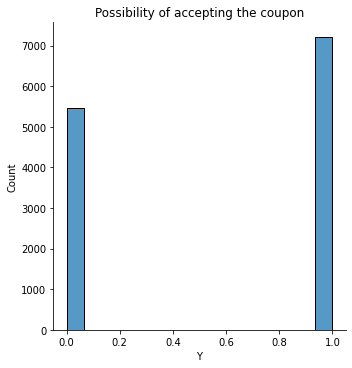

In [29]:
#closer look at Y distribution
#Checking target frequency
sns.displot(df, x='Y')
plt.title("Possibility of accepting the coupon")

In [30]:
#to confirm Y is well balanced
df.Y.value_counts()

1    7210
0    5474
Name: Y, dtype: int64

**Observations:**
-Nothing to do. Target frequency is well balanced. Thus, we can use Accuracy as a metric for model performance.

#2) Ploating the relation between the features and the target feature.

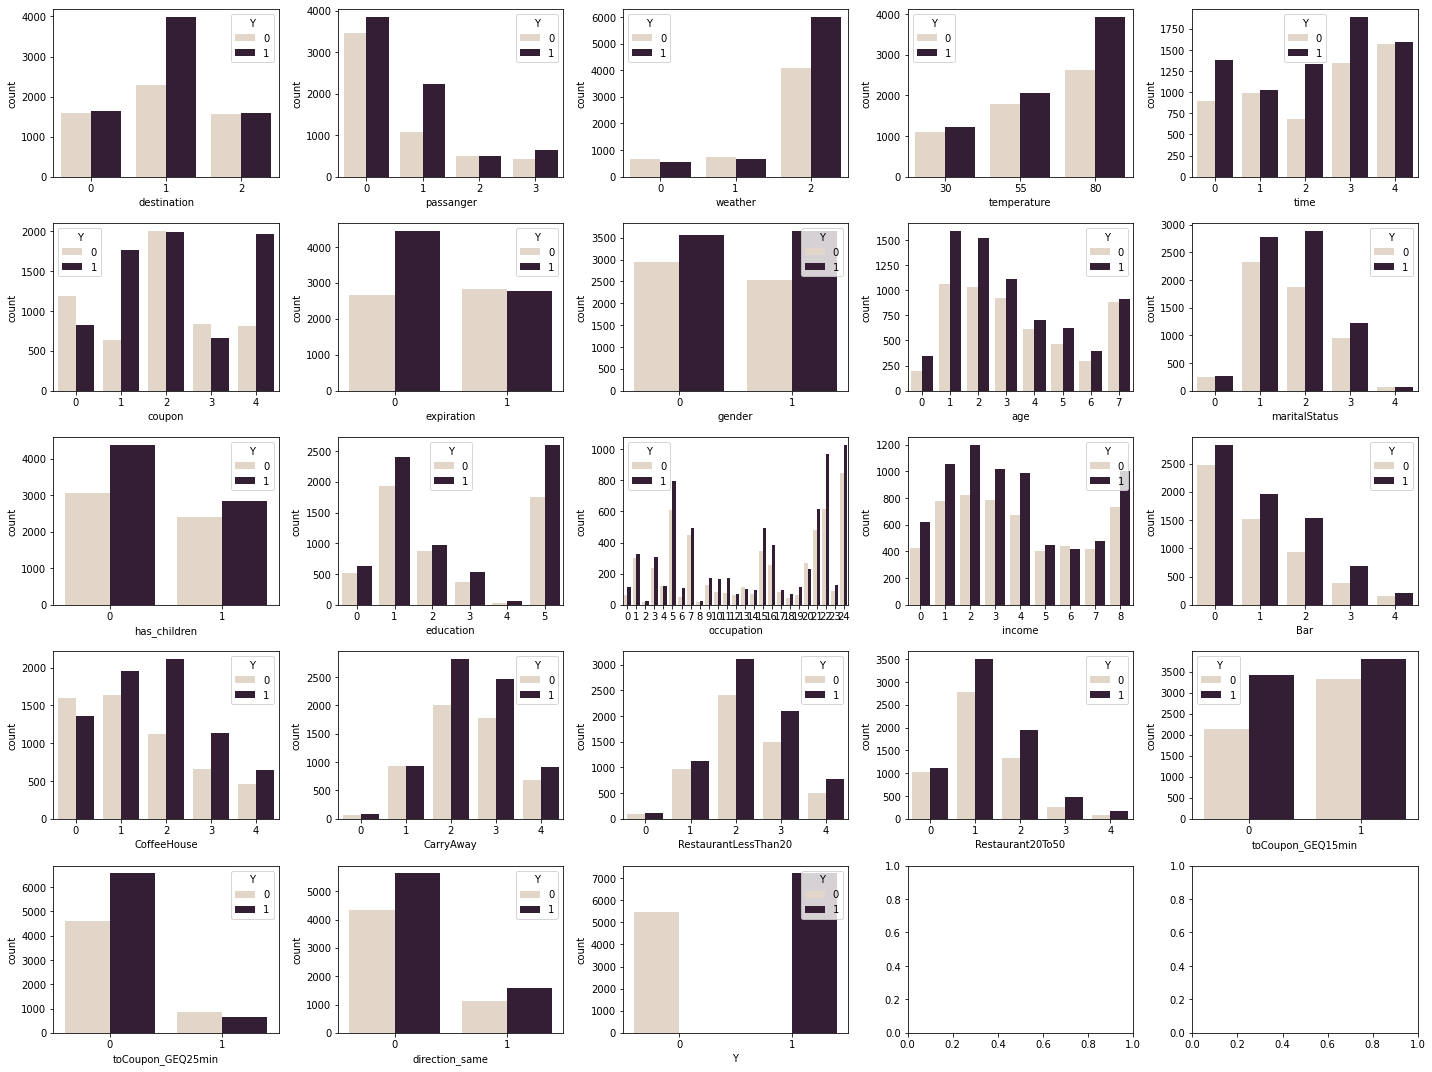

In [31]:
fig, axes = plt.subplots(5, 5, figsize=(20, 15))
axes = axes.flatten()
  
for ax, col in zip(axes, df.select_dtypes('int64').columns):
    sns.countplot(x=col, hue='Y', data=df, 
                  ax=ax, palette="ch:.25");

plt.tight_layout()
plt.show()

**Observations: **

- **destination to Y relation:** The possibility of accepting the coupon is higher when the drivers have no urgent place to go.

- **passenger to Y relation:** The possibility of accepting the coupon is higher when the driver is alone.

- **weather to Y relation:** The possibility of accepting the coupon is higher when it is sunny.

- **temperature to Y relation:** The possibility of accepting the coupon is higher when when it is 80 degrees.

- **time to Y relation:** The probability of accepting the coupon is higher, if the time is 6pm or 7pm, and not during the day.

- **coupon to Y relation:** 
1) The possibility of accepting coupons for resturants that cost less than 20 dollars, carry out and take away is high.
2) The acceptance and rejection of coffee house coupons is equal.
3) coupons for bars and resturants that cost between 20-50 dollars have a higher rejection rate.

- **expiration to Y relation:** Coupon that expire in one day have higher acceptance rate than the ones expiring in two hours.

- **gender to Y relation:** Both genders have the same rates.

- **age to Y relation:** drivers between 21 to 36 years old accept more coupons.

- **maritalStatus to Y relation:** Single drivers accept the coupons more.

- **has_children to Y relation:** Driver's who do not have children are more likely to accept coupons.

- **education to Y relation:** Some college, Bachelor or high school graduate are more likely to accept the coupon.

- **occupation to Y relation:** drivers who are unemployed, students, work in sales, or computers have the highest tendency to accept the copouns.

- **income to Y relation:** middle class drivers have a higher tendency to accept the copouns.
- **Bar to Y relation:** The lower the frequancy of visits the higher possiblity of accepting the copoun.

- **CoffeeHouse to Y relation:**  moderate frequancy of visits has a higher possiblity of accepting the coupon.

- **CarryAway to Y relation:**   moderate frequancy of visits has a higher possiblity of accepting the coupon.
- **RestaurantLessThan20 to Y relation:**   moderate frequancy of visits has a higher possiblity of accepting the coupon.
- **Restaurant20To50 to Y relation:**  if the driver went less than once they have a higher tendancy of accepting the copoun.
- **toCoupon_GEQ15min to Y relation:**  not much difference
- **toCoupon_GEQ25min to Y relation:**  if the distance is less than 25mins to the ccpou location it will be more likley to be accepted. 
- **direction_same to Y relation:**  if the direction is not the same, the coupons get purchased more.






In [32]:
# Save the preprocessed dataset to csv
df.to_csv('preprocessed_df.csv')

# 3D Dimensionality Visualization

In [33]:
""""""""""
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

rndperm = np.random.permutation(df.shape[0])
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["Y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()
"""""""""""""""""""

SyntaxError: ignored

# Feature Selection

After data cleaning and manual feature selection. we are still left with 22 features. We will apply some feature selection methods to reduce the data dimensionality

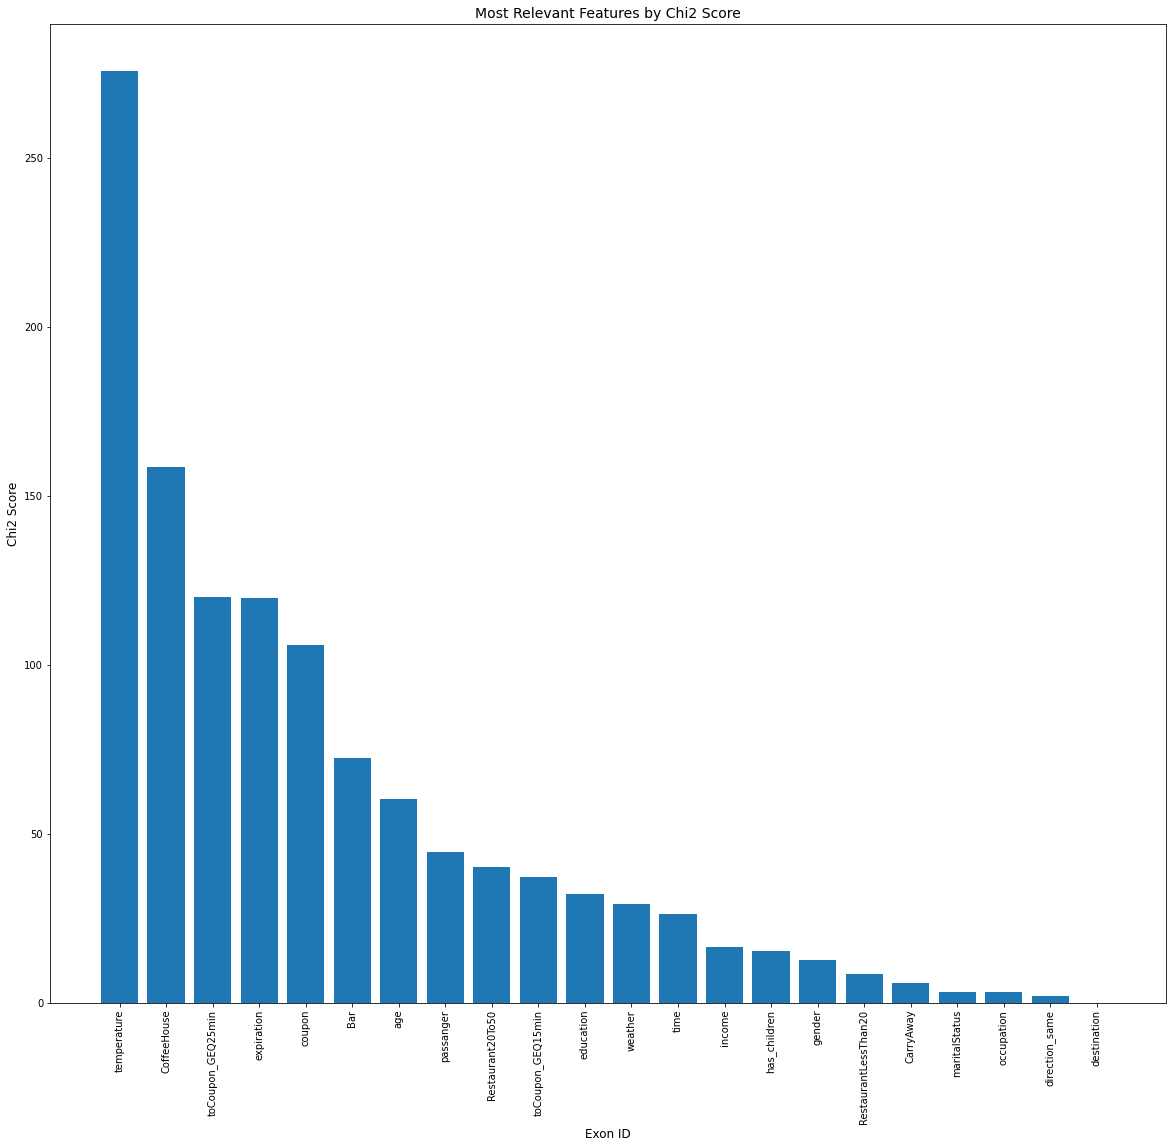

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel

"""
    feature_selection performs a series of feature selection steps on the 
    data. First the features are passed through a Chi2 filter and the 'n'
    best features are selected. Then the features are transformed using a 
    standard scaler (normalized). Then 0 variance features are removed. Lastly, 
    another round of feature selection is performed, using a random forest.
    :param X: the feature matrix (numpy array)
    :param y: the target matrix (numpy array)
    :param n: the number of features to select with Chi2 filter (int)

""" 

# Create features and target
X = df.drop(columns=['Y'])
y = df.Y

# Apply Chi2 filter to score the features
bestfeatures = SelectKBest(score_func=chi2, k=22)
fit = bestfeatures.fit(X, y)
X_filtered = fit.transform(X)
plot_best_scores(fit, X)


In [34]:
# To plot the features selected by chi2
def plot_best_scores(model, X):
    """
    plot_best_scores plots the 22 features that obtained the highest scores
    via Chi2 selection on a bar chart.
    :param model: the fit model (object)
    :param X: a Dataframe containing the scores and feature names (Dataframe)
    :return: None
    """
    dfscores = pd.DataFrame(model.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Features','Score']  #naming the dataframe columns

    # OPTIONAL PLOTTING
    scores_array = featureScores.nlargest(22,'Score')
    scores_list = scores_array['Score'].tolist()
    features_list = scores_array['Features'].tolist()
    plt.bar(features_list, scores_list)
    plt.title("Most Relevant Features by Chi2 Score", fontsize = 14)
    plt.xlabel("Exon ID", fontsize = 12)
    plt.ylabel("Chi2 Score", fontsize = 12)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
#dimensionality reduction
""""""""""
def reduce_dimensions(X, y, n_dim):
"""""""""""
    """
    reduce_dimensions performs dimensionality reduction by applying 
    linear discriminant analysis. This can boost classification results 
    (although we lose the connection between the features and the result).
    :param X: the feature matrix (numpy array)
    :param y: the target matrix (numpy array)
    :param n_dim: the number of features after transformation (int)
    :return: X_lda - the transformed feature matrix (numpy array)
   """
"""""""""""
    lda = LinearDiscriminantAnalysis(n_components = n_dim)
    X_lda = lda.fit_transform(X, y)
    
    return X_lda
""""""""""""

In [ ]:
""""""""""
#OneHotEncode the entire dataset to give unique binary vector to each value 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

enc = OneHotEncoder(dtype='int64')

df_cat =  df.select_dtypes(include=['int64']).copy()

df_enc = pd.DataFrame()
for col in df_cat.columns:
    enc_results = enc.fit_transform(df_cat[[col]])
    df0 = pd.DataFrame(enc_results.toarray())
    df_enc = pd.concat([df_enc,df0], axis=1)

df = df_enc.copy()

""""""""""

# Classification Techniques

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random

# ----------------------------------------------------------------------------
def validate_model(data, classifier):
    """
    validate_model_svm runs the DecisionTree Classifier 10-fold cross-validation and outputs
    the accuracy, as well as a confusion matrix and some other performance measures.
    ----------------------------------------------------------------------------
    :param data: a dataframe containing stock data
    :return: None(performance measures are printed)
    """
    X = df.drop(columns=['Y'], axis=1)
    y = df.Y

    # set random seed for reproducibility
    RANDOM_SEED = 2021
    os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)

    ### SET UP CROSS-VALIDATION (K-FOLD) ###
    k = 10
    kf = KFold(n_splits=k, shuffle = True, random_state=RANDOM_SEED)
    
    # Select the Model
    if (classifier == 'DT'):
        model = DecisionTreeClassifier(random_state=RANDOM_SEED)
    elif (classifier == 'SVM'):
        model = SVC(kernel="rbf", random_state=None, probability=True, cache_size=500, gamma=0.1)
    elif (classifier == 'RF'):
        model = RandomForestClassifier(n_jobs = -1, max_depth = 10) 
    elif (classifier == 'LR'):
        model = LogisticRegression(solver = 'newton-cg', random_state=0) 
    elif (classifier == 'NB'):
        model = GaussianNB()
    else:
        # Find the best value for K
        knn = KNN()
        param_grid = {'n_neighbors': np.arange(1, 21)}
        knn_gscv = GridSearchCV(knn, param_grid, cv=10)
        knn_gscv.fit(X, y)
        k = int(knn_gscv.best_params_['n_neighbors'])
        # Instatiate the model
        model = KNN(n_neighbors = k)

    y_pred = cross_val_predict(model, X, y, cv = kf)

    cm = confusion_matrix(y, y_pred)
    TP = cm[1, 1] # True Positives
    TN = cm[0, 0] # True Negatives
    FP = cm[0, 1] # False Positives
    FN = cm[1, 0] # False Negatives
    n = len(X)   # Number of Samples
    
    # Precision
    precision = TP / (TP + FP)

    # Negative Predicted Value
    NPV = TN / (TN + FN)

    # Specificity
    specificity = TN / (TN + FP)

    # Sensitivity
    sensitivity = TP / (TP + FN)

    # Accuracy
    accuracy = (TP + TN) / n

    #print("Confusion Matrix:")
    print(cm)
    print("Precision = {:.4f}".format(precision))
    print("NPV = {:.4f}".format(NPV))
    print("Specificity = {:.4f}".format(specificity))
    print("Sensitivity = {:.4f}".format(sensitivity))
    print("Accuracy = {:.4f}".format(accuracy))
    return accuracy, precision, k


In [37]:
import os
import random

def train_model(data, classifier, k = 0):
    """
    train_model trains the model using all of the data in the dataframe input.
    It returns a trained model that make predictions using model.predict(X).
    ----------------------------------------------------------------------------
    :param data: a dataframe containing stock data for training the model
    :return: a trained model that can be used to make predictions
    """
    X = df.drop(columns=['Y'], axis=1)
    y = df.Y

    # set random seed for reproducibility
    RANDOM_SEED = 2021
    os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)

    # Select the Model
    if (classifier == 'DT'):
        model = DecisionTreeClassifier(random_state=22)
    elif (classifier == 'SVM'):
        model = SVC(kernel="rbf", random_state=None, probability=True, cache_size=500, gamma=0.1)
    elif (classifier == 'RF'):
        model = RandomForestClassifier(n_jobs = -1, max_depth = 10) 
    elif (classifier == 'LR'):
        model = LogisticRegression(solver = 'newton-cg', random_state=0) 
    elif (classifier == 'NB'):
        model = model = GaussianNB()
    else:
        model = KNN(n_neighbors = k)    
    
    # Fit and return the model
    model.fit(X, y)
    return model

In [39]:
import os
import random

acc_knn, acc_svm, acc_dt, acc_df, acc_LR, acc_NB = 0, 0 , 0, 0, 0, 0
ppv_knn, ppv_svm, ppv_dt, ppv_rf, ppv_LR, ppv_NB = 0, 0, 0, 0, 0, 0

data = df.copy()
SEPERATOR = '=========================================='
# DETERMINING THE BEST DECISION FUNCTION *************************************

# LR Classifier --------------------------------------------------------------
print(SEPERATOR)
print('LR Classifier:')
# Test the model
acc_rf, ppv_rf, k = validate_model(data, 'LR')
# Store the model for making predictions
LR_model = train_model(data, 'LR')

# NB Classifier -------------------------------------------------------------
print(SEPERATOR)
print('NB Classifier:')
# Test the model
acc_knn, ppv_knn, k = validate_model(data, 'NB')
# Store the model for making predictions
NB_model = train_model(data, 'NB')

# KNN Classifier -------------------------------------------------------------
print(SEPERATOR)
print('KNN Classifier:')
# Test the model
acc_knn, ppv_knn, k = validate_model(data, 'KNN')
# Store the model for making predictions
knn_model = train_model(data, 'KNN', k)

# SVM Classifier -------------------------------------------------------------
print(SEPERATOR)
print('SVM Classifier:')
# Test the model
acc_svm, ppv_svm, k = validate_model(data, 'SVM')
# Store the model for making predictions
svm_model = train_model(data, 'SVM')

# DT Classifier --------------------------------------------------------------
print(SEPERATOR)
print('DT Classifier:')
# Test the model
acc_dt, ppv_dt, k = validate_model(data, 'DT')
# Store the model for making predictions
dt_model = train_model(data, 'DT')

# RF Classifier --------------------------------------------------------------
print(SEPERATOR)
print('RF Classifier:')
# Test the model
acc_rf, ppv_rf, k = validate_model(data, 'RF')
# Store the model for making predictions
rf_model = train_model(data, 'RF')


# DETERMINE THE BEST ACCURACY / PRECISION ************************************

# Aaccuracy ------------------------------------------------------------------
print(SEPERATOR)
dict1 = {'KNN': acc_knn, 'SVM': acc_svm, 'DT': acc_dt, 'RF': acc_rf, 'NB': acc_NB, 'LR': acc_LR}
max_key = max(dict1, key=dict1.get)
max_value = max(dict1.values())
print("Best Accuracy Among Five Classifiers")
print("------------------------------------")
print("Max Accuracy achieved by", max_key, "classifier")
print("Max Accuracy = {:.4f}".format(max_value))

# Precision ------------------------------------------------------------------
print(SEPERATOR)
dict2 = {'KNN': ppv_knn, 'SVM': ppv_svm, 'DT': ppv_dt, 'RF':ppv_rf, 'NB':ppv_NB, 'LR':ppv_LR}
max_key1 = max(dict2, key=dict2.get)
max_value1 = max(dict2.values())
print("Best Precision Among Five Classifiers")
print("------------------------------------")
print("Max Precision Achieved By", max_key1, "classifier")
print("Max Precision = {:.4f}".format(max_value1))

LR Classifier:
[[2374 3100]
 [1607 5603]]
Precision = 0.6438
NPV = 0.5963
Specificity = 0.4337
Sensitivity = 0.7771
Accuracy = 0.6289
NB Classifier:
[[2123 3351]
 [1618 5592]]
Precision = 0.6253
NPV = 0.5675
Specificity = 0.3878
Sensitivity = 0.7756
Accuracy = 0.6082
KNN Classifier:
[[2481 2993]
 [1700 5510]]
Precision = 0.6480
NPV = 0.5934
Specificity = 0.4532
Sensitivity = 0.7642
Accuracy = 0.6300
SVM Classifier:
[[2863 2611]
 [1675 5535]]
Precision = 0.6795
NPV = 0.6309
Specificity = 0.5230
Sensitivity = 0.7677
Accuracy = 0.6621
DT Classifier:
[[3523 1951]
 [2049 5161]]
Precision = 0.7257
NPV = 0.6323
Specificity = 0.6436
Sensitivity = 0.7158
Accuracy = 0.6846
RF Classifier:
[[3169 2305]
 [1068 6142]]
Precision = 0.7271
NPV = 0.7479
Specificity = 0.5789
Sensitivity = 0.8519
Accuracy = 0.7341
Best Accuracy Among Five Classifiers
------------------------------------
Max Accuracy achieved by RF classifier
Max Accuracy = 0.7341
Best Precision Among Five Classifiers
---------------------